# Web Scraping using Python (and Beautiful Soup)
In this tutorial, you'll learn how to extract data from the web, manipulate and clean data using Python's Pandas library, and data visualize using Python's Matplotlib library.

Web scraping is a term used to describe the use of a program or algorithm to extract and process large amounts of data from the web. Whether you are a data scientist, engineer, or anybody who analyzes large amounts of datasets, the ability to scrape data from the web is a useful skill to have. Let's say you find data from the web, and there is no direct way to download it, web scraping using Python is a skill you can use to extract the data into a useful form that can be imported.

In this tutorial, you will learn about the following:

- Data extraction from the web using Python's Beautiful Soup module
- Data manipulation and cleaning using Python's Pandas library
- Data visualization using Python's Matplotlib library
  
The dataset used in this tutorial was taken from a 10K race that took place in Hillsboro, OR on June 2017. Specifically, you will analyze the performance of the 10K runners and answer questions such as:

- What was the average finish time for the runners?
- Did the runners' finish times follow a normal distribution?
- Were there any performance differences between males and females of various age groups?

# Web Scraping using Beautiful Soup
Using Jupyter Notebook, you should start by importing the necessary modules (pandas, numpy, matplotlib.pyplot). If you don't have Jupyter Notebook installed, I recommend installing it using the Anaconda Python distribution which is available on the internet.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

### The urllib.request module is used to open URLs. The Beautiful Soup package is used to extract data from html files. The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

### After importing necessary modules, you should specify the URL containing the dataset and pass it to urlopen() to get the html of the page.

In [6]:
url = "https://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

### Getting the html of the page is just the first step. Next step is to create a Beautiful Soup object from the html. This is done by passing the html to the BeautifulSoup() function. The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. The second argument 'lxml' is the html parser whose details you do not need to worry about at this point.

In [7]:
soup = BeautifulSoup(html, 'lxml')
type(soup)
print(soup)

<!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!" property="og:title"/>
<meta content="Results of the 2017 Intel Great Place to Run \ Urban Clash Games at Hillsboro Stadium in Hillsboro, OR" property="og:description"/>
<meta content="https://www.hubertiming.com/results/2017GPTRForResults.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2017GPTR10K" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.2.1/css/bootstrap.min.css" rel="stylesheet"/>
<link href="https://use.fontawesome.com/releases/v5.13.0/css/all.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>
<link href="//cd

### The soup object allows you to extract interesting information about the website you're scraping such as getting the title of the page as shown below.

In [13]:
#Get the title
title = soup.title
print(title)
print(title.text)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>
Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!


### You can also get the text of the webpage and quickly print it out to check if it is what you expect.

In [14]:
# Print out the text
text = soup.get_text()
# print(soup.text)

### You can view the html of the webpage by right-clicking anywhere on the webpage and selecting "Inspect." This is what the result looks like.

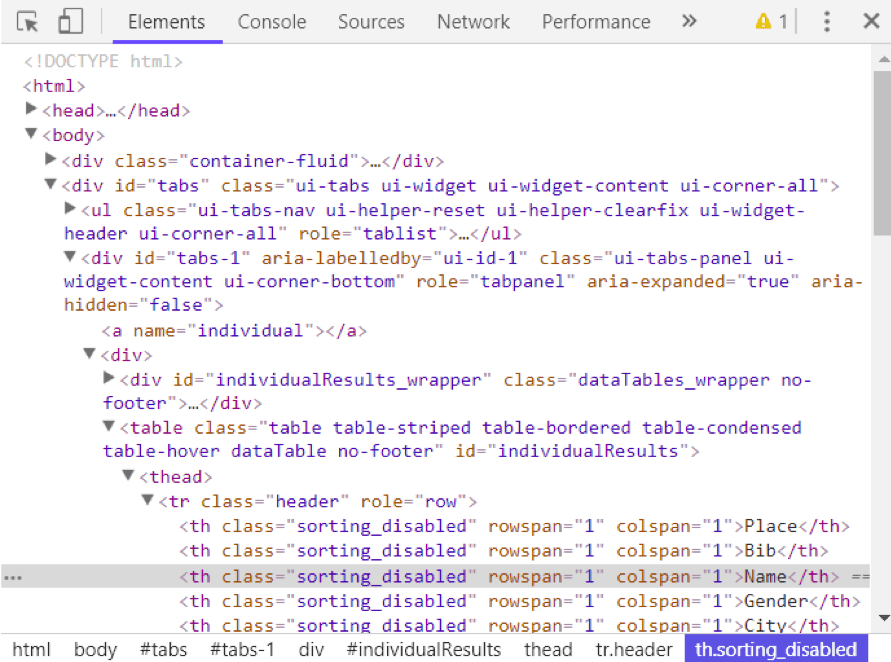

### You can use the `find_all()` method of soup to extract useful html tags within a webpage. Examples of useful tags include `< a >` for hyperlinks, `< table >` for tables, `< tr >` for table rows, `< th >` for table headers, and `< td >` for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [75]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

### As you can see from the output above, html tags sometimes come with attributes such as **class**, **src**, etc. These attributes provide additional information about html elements. You can use a for loop and the `get("href")` method to extract and print out only hyperlinks.

In [15]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))
    print("\n",link.text)


mailto:timing@hubertiming.com

 timing@hubertiming.com
https://www.hubertiming.com

 Huber Timing Home
/results/2017GPTR

  5K Individual
/results/team/2017GPTR

  5K Team
/results/team/2017GPTR10K

  10K Team
/results/summary/2017GPTR10K

  Summary
None

 
#tabs-1

 10K Results
https://www.hubertiming.com/

 Huber Timing
https://facebook.com/hubertiming/

 


## To print out table rows only, pass the `'tr'` argument in `soup.find_all()`.

In [21]:
all_links = soup.find_all("table")
print(all_links)
# for link in all_links:
#     print(link.)
#     # print("\n",link.text)

[<table class="pull-right text-xs-right" style="float:right">
<tbody>
<tr colspan="2">
<b>10K:</b>
</tr>
<tr>
<td>Finishers:</td>
<td>577</td>
</tr>
<tr>
<td>Male:</td>
<td>414</td>
</tr>
<tr>
<td>Female:</td>
<td>163</td>
</tr>
</tbody>
</table>, <table class="table table-striped table-hover ht-table table-responsive-md table-bordered" id="individualResults">
<thead>
<tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>
</thead>
<tbody>
<tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>
<tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=IN

In [24]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')

print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

           

### The goal of this tutorial is to take a table from a webpage and convert it into a dataframe for easier manipulation using Python. To get there, you should get all table rows in list form first and then convert that list into a dataframe. Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [25]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)


[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


### The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.

The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into `BeautifulSoup()` and use the `get_text()` method to extract the text without html tags.

In [26]:
for td in row_td:
    print("\n",td.text)
   


 577

 443

 

                    LIBBY B MITCHELL

                

 F

 HILLSBORO

 OR

 1:41:18

 1:42:10

 


In [27]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


This code converts the contents of a table cell (represented by row_td) into a string (str_cells). Then, it uses the BeautifulSoup library to parse the HTML in str_cells and extract the text content (cleantext). Finally, it prints the cleaned text.


The BeautifulSoup function takes two arguments: the HTML to be parsed (str_cells) and the parser to be used ("lxml" in this case). The get_text() method is then called on the resulting BeautifulSoup object to extract the text content.

##### Using regular expressions is discouraged because it requires multiple lines of code and is prone to errors. To remove content inside `<td>` HTML tags, you first compile a regular expression with `re.compile()` that matches the text between tags in a non-greedy way (using `.*?`). Then, `re.sub()` replaces matching substrings with an empty string. The process involves extracting text between the tags for each table row and appending the results to a list.

In [28]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)


[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

### The next step is to convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.

In [81]:
df = pd.DataFrame(list_rows)
df.to_string()

"                                                                                                                                                                                                           0\n0                                                                                                                                                                                                         []\n1                                                                                                                                                                                          [Finishers:, 577]\n2                                                                                                                                                                                               [Male:, 414]\n3                                                                                                                                                                              

In [82]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


## Data Manipulation and Cleaning
The dataframe is not in the format we want. To clean it up, you should split the "0" column into multiple columns at the comma position. This is accomplished by using the `str.split()` method.

In [83]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)


,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


This looks much better, but there is still work to do. The dataframe has unwanted square brackets surrounding each row. You can use the strip() method to remove the opening square bracket on column "0."

In [84]:
df1[0]

0               []
1      [Finishers:
2           [Male:
3         [Female:
4               []
          ...     
577           [573
578           [574
579           [575
580           [576
581           [577
Name: 0, Length: 582, dtype: object

In [85]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


The table is missing table headers. You can use the find_all() method to get the table headers.

In [86]:
col_labels = soup.find_all('th')
print(col_labels)

[<th>Place</th>, <th>Bib</th>, <th>Name</th>, <th>Gender</th>, <th>City</th>, <th>State</th>, <th>Time</th>, <th>Gun Time</th>, <th>Team</th>]


Similar to table rows, you can use Beautiful Soup to extract text in between html tags for table headers.

In [87]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)


['[Place, Bib, Name, Gender, City, State, Time, Gun Time, Team]']


You can then convert the list of headers into a pandas dataframe.

In [88]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Time, ..."


Similarly, you can split column "0" into multiple columns at the comma position for all rows.

In [89]:
df3 = df2[0].str.split(',', expand=True)
df3.head()


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]


The two dataframes can be concatenated into one using the concat() method as illustrated below.

In [90]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)


,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


Below shows how to assign the first row to be the table header.

In [91]:
df5 = df4.copy()  # Make a copy to avoid changing the original DataFrame
df5.columns = df5.iloc[0]  # Assign the first row as column names
df5 = df5[1:]  # replace the first row after it has been used as header
df5.head()


#or
#df5 = df4.rename(columns=df4.iloc[0])
#df5.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None


At this point, the table is almost properly formatted. For analysis, you can start by getting an overview of the data as shown below.

In [92]:
df5.info()
df5.shape


<class 'pandas.core.frame.DataFrame'>
Index: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     582 non-null    object
 1    Bib       580 non-null    object
 2    Name      577 non-null    object
 3    Gender    577 non-null    object
 4    City      577 non-null    object
 5    State     577 non-null    object
 6    Time      577 non-null    object
 7    Gun Time  577 non-null    object
 8    Team]     577 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(582, 9)

The table has 597 rows and 14 columns. You can drop all rows with any missing values.

In [93]:
df6 = df5.dropna(axis=0, how='any')
print(df6.head(20))

0  [Place   Bib                                               Name  Gender  \
5       1   814   \r\n\r\n                    JARED WILSON\r\n\...       M   
6       2   573   \r\n\r\n                    NATHAN A SUSTERSI...       M   
7       3   687   \r\n\r\n                    FRANCISCO MAYA\r\...       M   
8       4   623   \r\n\r\n                    PAUL MORROW\r\n\r...       M   
9       5   569   \r\n\r\n                    DEREK G OSBORNE\r...       M   
10      6   642   \r\n\r\n                    JONATHON TRAN\r\n...       M   
11      7   144   \r\n\r\n                    GEORGE TOTONCHY\r...       M   
12      8   395   \r\n\r\n                    BENJAMIN C CHAFFI...       M   
13      9     7   \r\n\r\n                    BRANDON THOMAS\r\...       M   
14     10     3   \r\n\r\n                    ERIK BJORNSTAD\r\...       M   
15     11    68   \r\n\r\n                    WITALI SPULING\r\...       M   
16     12   788   \r\n\r\n                    ANDY WEDAM\r\n\r\.

Also, notice how the table header is replicated as the first row in df5. It can be dropped using the following line of code.

In [94]:
df7 = df6.drop(df6.index[0])
df7.head()


,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...
10,6,642,\r\n\r\n JONATHON TRAN\r\n...,M,PORTLAND,OR,39:49,39:55,]


You can perform more data cleaning by renaming the '[Place' and ' Team]' columns. Python is very picky about space. Make sure you include space after the quotation mark in ' Team]'.

In [95]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.rename(columns={'Gun Time ':'GunTime'},inplace=True)
df7.rename(columns={'Place':'Places'},inplace=True)
df7.head()


,Places,Bib,Name,Gender,City,State,Time,Gun Time,Team
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...
10,6,642,\r\n\r\n JONATHON TRAN\r\n...,M,PORTLAND,OR,39:49,39:55,]


The final data cleaning step involves removing the closing bracket for cells in the "Team" column.

In [96]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()


,Places,Bib,Name,Gender,City,State,Time,Gun Time,Team
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...
10,6,642,\r\n\r\n JONATHON TRAN\r\n...,M,PORTLAND,OR,39:49,39:55,


In [97]:
df.to_string()

"                                                                                                                                                                                                           0\n0                                                                                                                                                                                                         []\n1                                                                                                                                                                                          [Finishers:, 577]\n2                                                                                                                                                                                               [Male:, 414]\n3                                                                                                                                                                              

It took a while to get here, but at this point, the dataframe is in the desired format. Now you can move on to the exciting part and start plotting the data and computing interesting statistics